If we assume our data to be gaussian , we end up with 


$P(y|x) = \frac{1}{1 + e^{-zy}}$ where $z = w^T x$ and $y \in \{0, 1\}$


Key idea:

Instead of modeling our data with distributions , calculate it and then find the decision boundary find the best fit directly.In other words instead of gettting p(x|y) and p(y) we get p(y|x) directly.











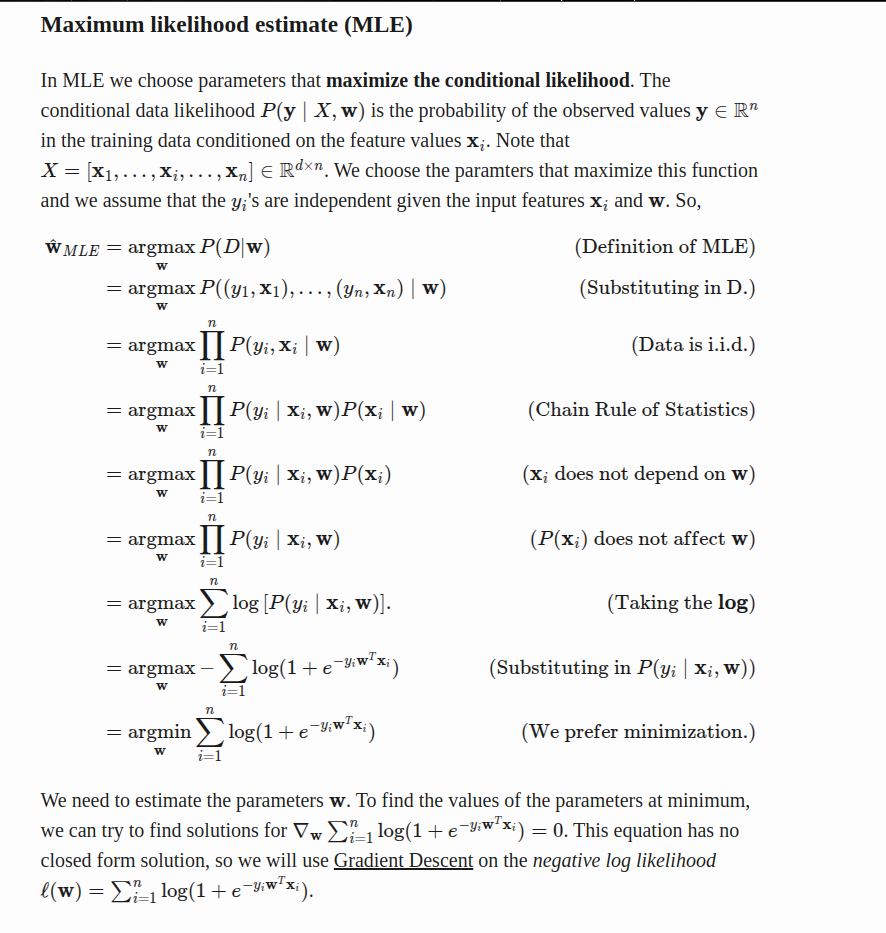

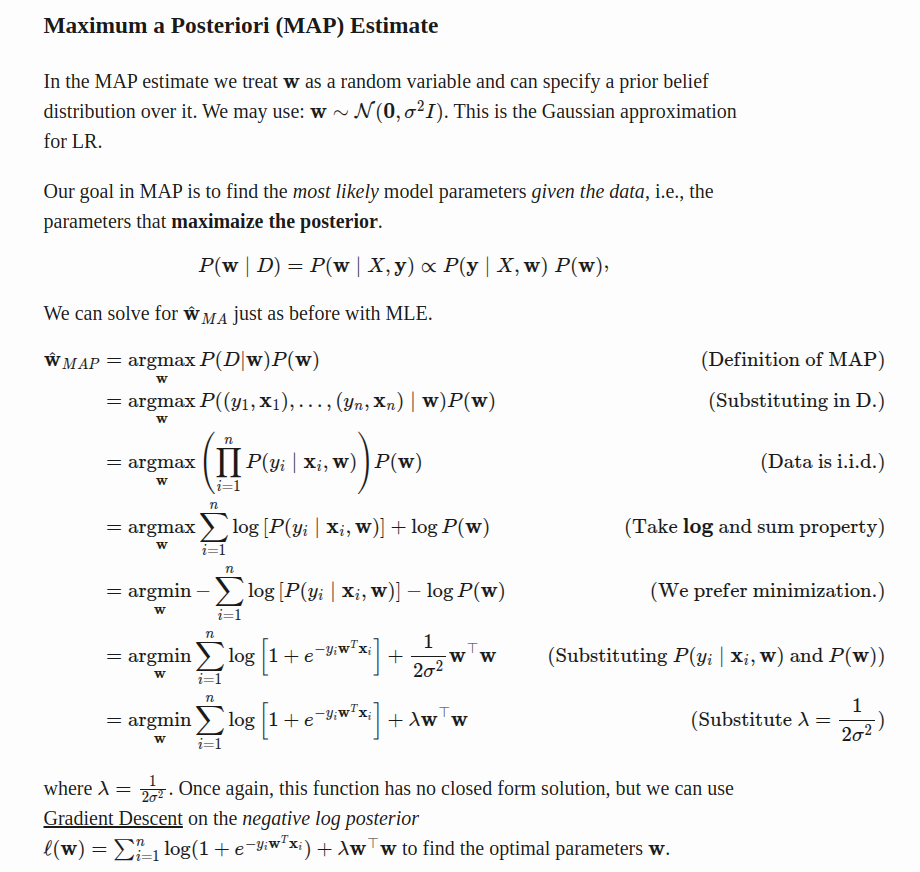

In [2]:
from IPython.display import Image, display

# Display logistic regression visualization images
display(Image(filename='images/logisticregression1.png'))
display(Image(filename='images/logisticregression2.png'))


Custom Logistic Regression Accuracy: 82.50%
Sklearn Logistic Regression Accuracy: 83.00%


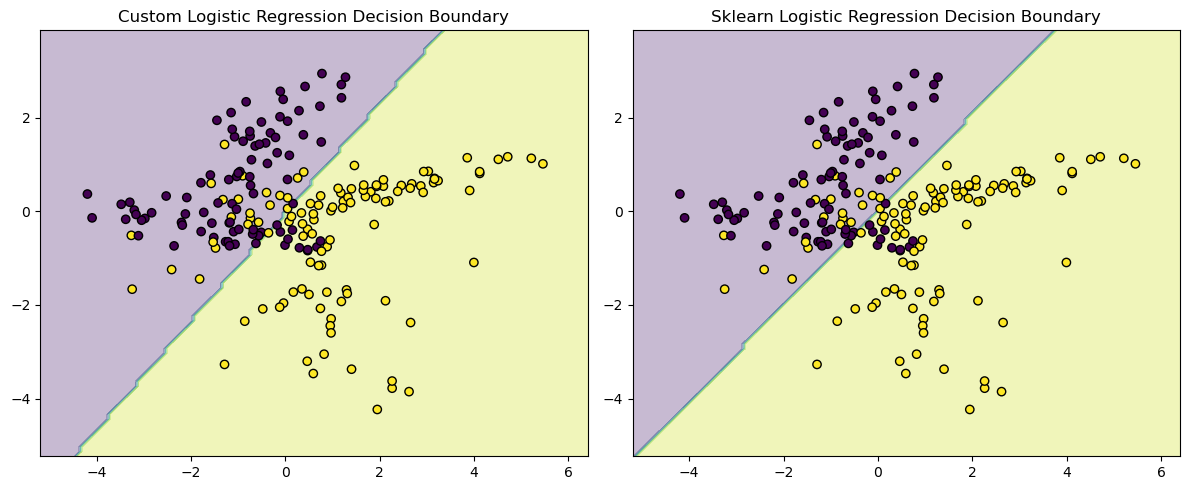

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the custom logistic regression model
custom_model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
custom_model.fit(X_train, y_train)

# Make predictions on the test set using the custom model
custom_predictions = custom_model.predict(X_test)

# Calculate and print the accuracy of the custom model
custom_accuracy = accuracy_score(y_test, custom_predictions)
print(f"Custom Logistic Regression Accuracy: {custom_accuracy * 100:.2f}%")

# Initialize and train the sklearn logistic regression model
sklearn_model = SklearnLogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, y_train)

# Make predictions on the test set using the sklearn model
sklearn_predictions = sklearn_model.predict(X_test)

# Calculate and print the accuracy of the sklearn model
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Sklearn Logistic Regression Accuracy: {sklearn_accuracy * 100:.2f}%")

# Apply PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot decision boundaries
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

# Train models on PCA-transformed data
custom_model_pca = LogisticRegression(learning_rate=0.01, num_iterations=1000)
custom_model_pca.fit(X_train_pca, y_train)

sklearn_model_pca = SklearnLogisticRegression(max_iter=1000)
sklearn_model_pca.fit(X_train_pca, y_train)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot decision boundaries for both models
plot_decision_boundary(axes[0], custom_model_pca, X_test_pca, y_test, "Custom Logistic Regression Decision Boundary")
plot_decision_boundary(axes[1], sklearn_model_pca, X_test_pca, y_test, "Sklearn Logistic Regression Decision Boundary")

plt.tight_layout()
plt.show()
